In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from collections import Counter
import seaborn as sns
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#users = pd.read_csv('users.csv')
#events = pd.read_csv('events.csv')
#relations = pd.read_csv('relations.csv')
users = pd.read_csv('/content/drive/My Drive/users.csv')
events = pd.read_csv('/content/drive/My Drive/events.csv')
relations = pd.read_csv('/content/drive/My Drive/relations.csv')

In [ ]:
users.head()

,user_id,date_of_birth,sex,tag_id
0,"""8efb1bdf-40c9-48f2-aa34-89fea364f468""","""2005-10-24""",2,1
1,"""b419b089-235d-4278-a613-495c1ee08d5d""",NaN,3,1
2,"""34891c96-be02-4a61-9bcc-0afdaeb73449""",NaN,3,1
3,"""8de77528-bcd7-473a-bd87-a1d06021f617""",NaN,3,1
4,"""b1bc1f08-060a-4b37-94a9-63f5d5e23484""",NaN,3,1


In [ ]:
users_grouped = users.groupby(['user_id', 'sex', 'date_of_birth'], dropna = False)['tag_id'].apply(list).reset_index()

In [ ]:
users_grouped.head()

,user_id,sex,date_of_birth,tag_id
0,"""00267f31-a9d0-4fca-93c7-7af4f28e10c8""",1,NaN,"[1, 2, 3, 4, 5, 7, 10, 14, 15, 23, 24, 44, 57,..."
1,"""003a4bdc-07d3-4833-8af4-f5b90925b332""",1,"""2001-08-10""","[4, 5, 10, 11, 23, 24, 25, 27, 28, 29, 30, 32,..."
2,"""003f66b9-5455-4147-9bb1-37d8867dd57e""",2,NaN,"[4, 7, 27, 29, 35, 37, 56, 58, 59]"
3,"""00bdcd8a-2e20-4aa2-9942-3b0eeb506701""",2,NaN,"[5, 15, 17, 27, 29, 30, 32, 33, 35, 37, 39, 40..."
4,"""00c357d7-ac60-4327-b840-7535f4a3e8e3""",2,"""2004-12-30""","[15, 21, 23, 24, 25, 26, 27, 28, 29, 30, 32, 3..."


In [ ]:
current_date = pd.Timestamp.now()
users_grouped['date_of_birth'] = pd.to_datetime(users_grouped['date_of_birth'], format = '"%Y-%m-%d"')
users_grouped['age'] = round((current_date - users_grouped['date_of_birth']).dt.days/365.25, 0)
users_grouped.loc[users_grouped['age']>=30, 'age'] = 30

In [ ]:
def most_popular_tags(data, chart = False, label=None):
  tag_list = []
  for string in data:
    tag_list.append(string)
  tag_list = [x for l in tag_list for x in l]
  tags_amount = Counter(tag_list)
  tags = list(dict(sorted(tags_amount.items())).keys())
  amount = list(dict(sorted(tags_amount.items())).values())
  if(chart):
    plt.bar(tags, amount)
    plt.xlabel('Тэги')
    plt.ylabel('Количество проставленных тэгов')
    plt.title(label)
    plt.show()

  return tags, amount


In [ ]:
users_grouped

,user_id,sex,date_of_birth,tag_id,age
0,"""00267f31-a9d0-4fca-93c7-7af4f28e10c8""",1,NaT,"[1, 2, 3, 4, 5, 7, 10, 14, 15, 23, 24, 44, 57,...",NaN
1,"""003a4bdc-07d3-4833-8af4-f5b90925b332""",1,2001-08-10,"[4, 5, 10, 11, 23, 24, 25, 27, 28, 29, 30, 32,...",23.0
2,"""003f66b9-5455-4147-9bb1-37d8867dd57e""",2,NaT,"[4, 7, 27, 29, 35, 37, 56, 58, 59]",NaN
3,"""00bdcd8a-2e20-4aa2-9942-3b0eeb506701""",2,NaT,"[5, 15, 17, 27, 29, 30, 32, 33, 35, 37, 39, 40...",NaN
4,"""00c357d7-ac60-4327-b840-7535f4a3e8e3""",2,2004-12-30,"[15, 21, 23, 24, 25, 26, 27, 28, 29, 30, 32, 3...",20.0
...,...,...,...,...,...
1653,"""ff96044a-900f-4d74-a076-6c6a21b5fdd8""",2,NaT,"[14, 28, 35, 38, 59, 63]",NaN
1654,"""ff993385-aa5c-4ffa-8f81-148e084c3e02""",2,2024-02-18,"[2, 5, 15, 16, 20, 27, 30, 31, 32, 35, 37, 39,...",1.0
1655,"""ffa44e62-5f5f-4aa8-a9ab-0f5589339420""",1,2005-10-07,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 19, 20, 21...",19.0
1656,"""ffa535f9-0f3b-43b4-9318-0644f0478bde""",1,NaT,"[3, 7, 21, 23, 24, 25, 28, 30, 37, 38, 42, 43,...",NaN


In [ ]:
events.head()

,event_id,date_start,date_end,address,full_descr,short_descr,tag_id,organizer_id
0,"""3d8f8cf2-4c55-414e-9750-03fd175704e3""","""2024-01-24T18:00:00Z""","""2024-01-24T20:20:00Z""","""Покровский бульвар д. 11, D201""","""Подземелья Вышки. \n\nЕсли вы всегда мечтали ...","""Захватывающий авторский сценарий по мотивам П...",10,"""e108495a-4c6e-46a3-9888-3877095d15f8"""
1,"""3d8f8cf2-4c55-414e-9750-03fd175704e3""","""2024-01-24T18:00:00Z""","""2024-01-24T20:20:00Z""","""Покровский бульвар д. 11, D201""","""Подземелья Вышки. \n\nЕсли вы всегда мечтали ...","""Захватывающий авторский сценарий по мотивам П...",36,"""e108495a-4c6e-46a3-9888-3877095d15f8"""
2,"""3d8f8cf2-4c55-414e-9750-03fd175704e3""","""2024-01-24T18:00:00Z""","""2024-01-24T20:20:00Z""","""Покровский бульвар д. 11, D201""","""Подземелья Вышки. \n\nЕсли вы всегда мечтали ...","""Захватывающий авторский сценарий по мотивам П...",22,"""e108495a-4c6e-46a3-9888-3877095d15f8"""
3,"""480a59f5-cb32-4a81-b6b5-9bcedb2bc988""","""2024-01-24T18:50:00Z""","""2024-01-24T20:30:00Z""","""Покровский бульвар д. 11, R405""","""Проверь свои знания о мире кино и телевидения...","""Проверь свои знания о мире кино""",37,"""6aaf7721-fba0-4758-8658-b7529c6210a1"""
4,"""480a59f5-cb32-4a81-b6b5-9bcedb2bc988""","""2024-01-24T18:50:00Z""","""2024-01-24T20:30:00Z""","""Покровский бульвар д. 11, R405""","""Проверь свои знания о мире кино и телевидения...","""Проверь свои знания о мире кино""",14,"""6aaf7721-fba0-4758-8658-b7529c6210a1"""


In [ ]:
events_grouped = events.groupby(['event_id'])['tag_id'].apply(list).reset_index()

In [ ]:
events_grouped.tail()

,event_id,tag_id
277,"""fbe6833c-d128-40a0-8831-ba83d7915977""","[23, 21]"
278,"""fcebd7bb-bf19-4d84-97a0-c087b71ed9eb""",[44]
279,"""fdf81bc8-f3c3-4d1e-8ceb-b1e6b1333c19""","[6, 5]"
280,"""feabd4e4-fb46-49a1-900a-632a61bd984f""","[58, 59, 6]"
281,"""ff983c3c-e14b-4ecd-b152-040dd045048e""",[57]


In [ ]:
relations.head()

,user,action,event
0,"""ddc1f2a7-22e6-484d-a72f-562d3e08e26d""","""WATCHED""","""e6ccb89a-9429-4ee2-b4d5-619fd1d48c3b"""
1,"""cd9366df-16dc-4a4f-8b8b-b4b7996d38b6""","""WATCHED""","""e6ccb89a-9429-4ee2-b4d5-619fd1d48c3b"""
2,"""853097e3-656d-490f-a5d9-a5944bc9d410""","""WATCHED""","""e6ccb89a-9429-4ee2-b4d5-619fd1d48c3b"""
3,"""2f270955-7622-4d4a-a0df-0b725665f08d""","""WATCHED""","""e6ccb89a-9429-4ee2-b4d5-619fd1d48c3b"""
4,"""a7d51a3a-18c9-41b5-9dfd-d2a7c42af45d""","""WATCHED""","""e6ccb89a-9429-4ee2-b4d5-619fd1d48c3b"""


In [ ]:
relations= relations.rename(columns={'user':'user_id', 'event':'event_id'})
users_and_events = pd.merge(relations, events_grouped, on='event_id', how='left')



In [ ]:
users_and_events

,user_id,action,event_id,tag_id
0,"""ddc1f2a7-22e6-484d-a72f-562d3e08e26d""","""WATCHED""","""e6ccb89a-9429-4ee2-b4d5-619fd1d48c3b""","[57, 39]"
1,"""cd9366df-16dc-4a4f-8b8b-b4b7996d38b6""","""WATCHED""","""e6ccb89a-9429-4ee2-b4d5-619fd1d48c3b""","[57, 39]"
2,"""853097e3-656d-490f-a5d9-a5944bc9d410""","""WATCHED""","""e6ccb89a-9429-4ee2-b4d5-619fd1d48c3b""","[57, 39]"
3,"""2f270955-7622-4d4a-a0df-0b725665f08d""","""WATCHED""","""e6ccb89a-9429-4ee2-b4d5-619fd1d48c3b""","[57, 39]"
4,"""a7d51a3a-18c9-41b5-9dfd-d2a7c42af45d""","""WATCHED""","""e6ccb89a-9429-4ee2-b4d5-619fd1d48c3b""","[57, 39]"
...,...,...,...,...
37364,"""eaf49992-8274-4d3d-bcd8-d972019064da""","""WATCHED""","""161f8a0b-4532-4830-a064-73b9c8288b47""",[65]
37365,"""3f42a7c3-8a7a-4068-a2f2-9f2b215092e1""","""WATCHED""","""161f8a0b-4532-4830-a064-73b9c8288b47""",[65]
37366,"""4643e19a-d946-48a8-ac3f-e9585083377c""","""WATCHED""","""161f8a0b-4532-4830-a064-73b9c8288b47""",[65]
37367,"""4bb19ea4-2c46-4d70-9106-efc06362ca84""","""WATCHED""","""161f8a0b-4532-4830-a064-73b9c8288b47""",[65]


In [ ]:
users_and_events['tag_id'] = users_and_events['tag_id'].apply(lambda x: ', '.join(map(str, x)))
users_and_events = users_and_events.groupby(['user_id', 'action']).agg({
    'event_id': lambda x: ', '.join(x),
    'tag_id': lambda x: ', '.join(map(str, x))}).reset_index()

In [ ]:
users_and_events = pd.merge(users_grouped, users_and_events, on='user_id', how='inner')

In [ ]:
#users statistics

users_and_events['number'] = users_and_events['event_id'].apply(lambda x: len(x.split(', ')))
users_info = users_and_events.drop(columns=['date_of_birth', 'event_id'])

users_info

,user_id,sex,tag_id_x,age,action,tag_id_y,number
0,"""00267f31-a9d0-4fca-93c7-7af4f28e10c8""",1,"[1, 2, 3, 4, 5, 7, 10, 14, 15, 23, 24, 44, 57,...",NaN,"""WATCHED""","62, 28, 27, 63, 44, 5, 7, 9, 62, 4, 3, 44, 62,...",5
1,"""003a4bdc-07d3-4833-8af4-f5b90925b332""",1,"[4, 5, 10, 11, 23, 24, 25, 27, 28, 29, 30, 32,...",23.0,"""WATCHED""","7, 31, 37, 37, 5, 31, 59, 58, 6, 40, 44, 47, 4...",20
2,"""003f66b9-5455-4147-9bb1-37d8867dd57e""",2,"[4, 7, 27, 29, 35, 37, 56, 58, 59]",NaN,"""WATCHED""","7, 4, 57, 63, 14, 44, 7, 9, 62, 4, 3, 14, 7, 2...",11
3,"""00bdcd8a-2e20-4aa2-9942-3b0eeb506701""",2,"[5, 15, 17, 27, 29, 30, 32, 33, 35, 37, 39, 40...",NaN,"""WATCHED""","44, 62, 59, 5",1
4,"""00c357d7-ac60-4327-b840-7535f4a3e8e3""",2,"[15, 21, 23, 24, 25, 26, 27, 28, 29, 30, 32, 3...",20.0,"""WATCHED""","57, 39, 28, 27, 57, 35, 28, 20, 26, 31, 26, 28...",10
...,...,...,...,...,...,...,...
2148,"""ff993385-aa5c-4ffa-8f81-148e084c3e02""",2,"[2, 5, 15, 16, 20, 27, 30, 31, 32, 35, 37, 39,...",1.0,"""WATCHED""","47, 40, 44, 44, 43, 40, 41, 45, 5, 6, 42, 45, ...",35
2149,"""ffa44e62-5f5f-4aa8-a9ab-0f5589339420""",1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 19, 20, 21...",19.0,"""LIKED""","37, 63, 5, 14, 44",1
2150,"""ffa44e62-5f5f-4aa8-a9ab-0f5589339420""",1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 19, 20, 21...",19.0,"""WATCHED""","7, 25, 22, 57, 14, 10, 27, 27, 31, 37, 47, 5, ...",48
2151,"""ffa535f9-0f3b-43b4-9318-0644f0478bde""",1,"[3, 7, 21, 23, 24, 25, 28, 30, 37, 38, 42, 43,...",NaN,"""WATCHED""","37, 57, 40, 44, 44, 43, 40, 41, 27, 28, 63, 42...",41


In [ ]:
events_and_users = pd.merge(users_grouped, relations, on='user_id', how='inner')

In [ ]:
events_and_users

,user_id,sex,date_of_birth,tag_id,age,action,event_id
0,"""00267f31-a9d0-4fca-93c7-7af4f28e10c8""",1,NaT,"[1, 2, 3, 4, 5, 7, 10, 14, 15, 23, 24, 44, 57,...",NaN,"""WATCHED""","""0a8bdee6-82f0-4e50-927e-9dfcf0550766"""
1,"""00267f31-a9d0-4fca-93c7-7af4f28e10c8""",1,NaT,"[1, 2, 3, 4, 5, 7, 10, 14, 15, 23, 24, 44, 57,...",NaN,"""WATCHED""","""e7b22e1b-b408-4739-ab85-c8a7e41839c6"""
2,"""00267f31-a9d0-4fca-93c7-7af4f28e10c8""",1,NaT,"[1, 2, 3, 4, 5, 7, 10, 14, 15, 23, 24, 44, 57,...",NaN,"""WATCHED""","""75273c0e-9999-48fc-8a35-24907acba29a"""
3,"""00267f31-a9d0-4fca-93c7-7af4f28e10c8""",1,NaT,"[1, 2, 3, 4, 5, 7, 10, 14, 15, 23, 24, 44, 57,...",NaN,"""WATCHED""","""37e67da2-53ad-4a6d-9142-dec7d87ce140"""
4,"""00267f31-a9d0-4fca-93c7-7af4f28e10c8""",1,NaT,"[1, 2, 3, 4, 5, 7, 10, 14, 15, 23, 24, 44, 57,...",NaN,"""WATCHED""","""884b2965-6e67-458c-bd5e-a705e3fef74b"""
...,...,...,...,...,...,...,...
36738,"""fffd9167-dec3-4f62-9888-5d73365aa0f9""",1,NaT,"[14, 20, 21, 23, 25, 28, 29, 32, 37, 38, 40, 4...",NaN,"""WATCHED""","""f9b56f3e-430f-4377-81aa-ad1a22fc0902"""
36739,"""fffd9167-dec3-4f62-9888-5d73365aa0f9""",1,NaT,"[14, 20, 21, 23, 25, 28, 29, 32, 37, 38, 40, 4...",NaN,"""WATCHED""","""8730e64e-4981-4af0-8f13-a4448190a699"""
36740,"""fffd9167-dec3-4f62-9888-5d73365aa0f9""",1,NaT,"[14, 20, 21, 23, 25, 28, 29, 32, 37, 38, 40, 4...",NaN,"""WATCHED""","""c184387a-181b-48bf-9ee0-fbab6cd38331"""
36741,"""fffd9167-dec3-4f62-9888-5d73365aa0f9""",1,NaT,"[14, 20, 21, 23, 25, 28, 29, 32, 37, 38, 40, 4...",NaN,"""WATCHED""","""9e1947e4-6dc3-4445-8a00-b422d896da0a"""


In [ ]:
events_and_users['tag_id'] = events_and_users['tag_id'].apply(lambda x: ', '.join(map(str, x)))

events_and_users = events_and_users.groupby(['event_id', 'action']).agg({
    'user_id': lambda x: ', '.join(x),
    'tag_id': lambda x: ', '.join(map(str, x)),
    'age': list}).reset_index()

In [ ]:
events_and_users = pd.merge(events_grouped, events_and_users, on='event_id', how='inner')

In [ ]:
#events statistics

events_and_users['number'] = events_and_users['user_id'].apply(lambda x: len(x.split(', ')))

events_info = events_and_users.drop(columns=['user_id'])

events_info

,event_id,tag_id_x,action,tag_id_y,age,number
0,"""01bc8e63-db3a-46e4-afbf-fc81dc9c2221""",[62],"""LIKED""","1, 2, 3, 4, 5, 6, 7, 8, 9, 14, 15, 20, 21, 22,...","[nan, 21.0]",2
1,"""01bc8e63-db3a-46e4-afbf-fc81dc9c2221""",[62],"""WATCHED""","2, 4, 5, 7, 18, 19, 23, 24, 25, 27, 37, 38, 40...","[nan, 20.0, 20.0, 27.0, nan, nan, 21.0, 28.0, ...",81
2,"""021ea774-f195-492e-bb64-3660767a222c""","[28, 27, 31, 39, 29]","""LIKED""","2, 6, 10, 23, 28, 30, 31, 36, 37, 45, 52, 59, ...","[21.0, 20.0, 21.0, 21.0, 26.0]",5
3,"""021ea774-f195-492e-bb64-3660767a222c""","[28, 27, 31, 39, 29]","""WATCHED""","4, 5, 7, 9, 14, 21, 25, 26, 28, 29, 32, 34, 38...","[20.0, 20.0, 24.0, 21.0, 19.0, 21.0, 28.0, 21....",89
4,"""03f78fba-3efc-4625-a868-32ed09931e9f""","[28, 26, 31, 20]","""LIKED""","10, 20, 22, 28, 30, 31, 32, 42, 1, 2, 3, 4, 5,...","[19.0, nan, nan, 21.0, nan, 30.0, nan, nan, 22...",16
...,...,...,...,...,...,...
605,"""fdf81bc8-f3c3-4d1e-8ceb-b1e6b1333c19""","[6, 5]","""LIKED""","2, 3, 5, 6, 9, 10, 11, 14, 15, 17, 18, 19, 21,...","[21.0, nan, 24.0, nan]",4
606,"""fdf81bc8-f3c3-4d1e-8ceb-b1e6b1333c19""","[6, 5]","""WATCHED""","1, 2, 3, 7, 14, 17, 19, 20, 23, 24, 25, 26, 27...","[20.0, nan, nan, nan, nan, nan, nan, nan, nan,...",134
607,"""feabd4e4-fb46-49a1-900a-632a61bd984f""","[58, 59, 6]","""LIKED""","1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 19, 21, 22,...","[20.0, 20.0, 19.0, 21.0, 21.0, 19.0, 19.0]",7
608,"""feabd4e4-fb46-49a1-900a-632a61bd984f""","[58, 59, 6]","""REGISTERED""","1, 2, 3, 4, 5, 7, 10, 35, 38, 40, 42, 44, 45, ...","[23.0, 20.0]",2


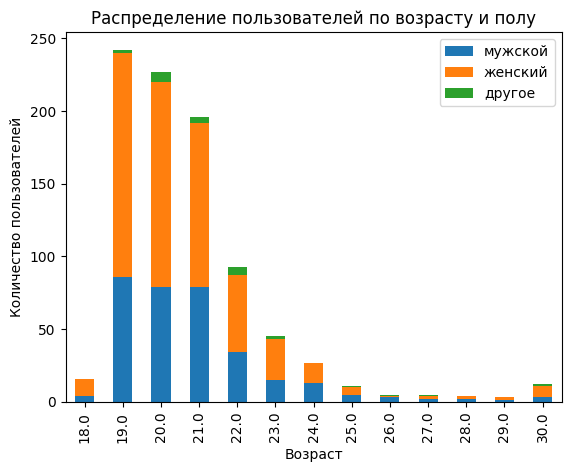

In [ ]:

classified_users = pd.DataFrame(users_grouped[(users_grouped['age'].isna() ==
                                  False) & (users_grouped['age']>=
                                            17)].groupby(['age', 'sex']).size()).unstack()
classified_users.plot(kind = 'bar', stacked = True)

plt.title('Распределение пользователей по возрасту и полу')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.legend(['мужской', 'женский', 'другое'])

plt.show()

Text(0.5, 1.0, 'Распределение действий пользователей')

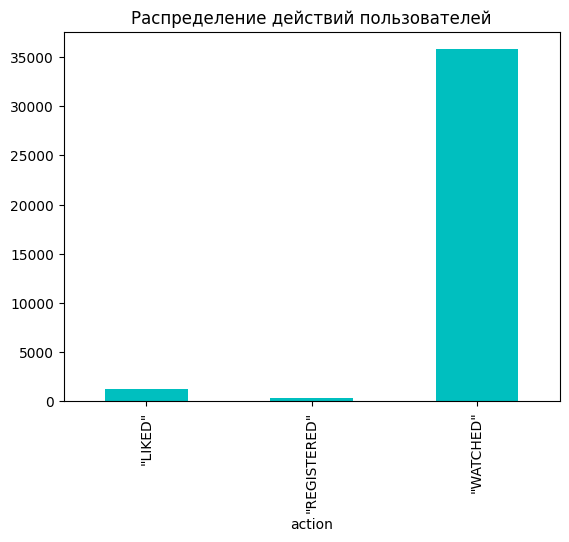

In [ ]:
relations.groupby('action').size().plot(kind='bar', color = 'c')
plt.title('Распределение действий пользователей')


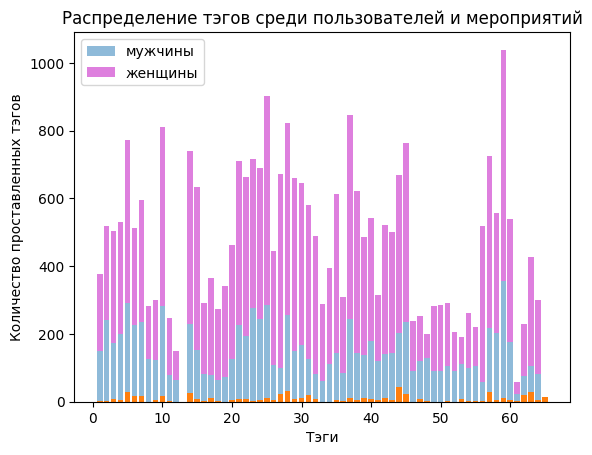

Количество тэгов мероприятий:  [1, 2, 7, 5, 29, 16, 16, 5, 17, 2, 27, 7, 1, 10, 2, 6, 7, 8, 1, 4, 11, 4, 22, 32, 7, 11, 21, 8, 5, 1, 10, 6, 11, 9, 6, 12, 6, 44, 22, 9, 1, 1, 7, 2, 3, 2, 28, 4, 11, 4, 1, 21, 29, 4, 14]


In [ ]:
tags_1, amount_1 =  most_popular_tags(users_grouped[users_grouped['sex']==1]['tag_id'])
tags_2, amount_2 = most_popular_tags(users_grouped[users_grouped['sex']==2]['tag_id'])

plt.bar(tags_1, amount_1, alpha = 0.5)
plt.bar(tags_1, amount_2, bottom = amount_1, color = 'm', alpha = 0.5)
plt.legend(['мужчины', 'женщины'])
print('Количество тэгов мероприятий: ', most_popular_tags(events_grouped['tag_id'], chart = True, label = 'Распределение тэгов среди пользователей и мероприятий')[1])



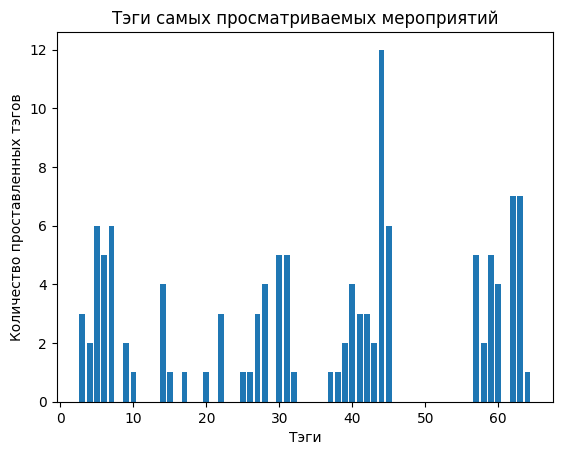

([3, 4, 5, 6, 7, 9, 10, 14, 15, 17, 20, 22, 25, 26, 27, 28, 30, 31, 32, 37, 38, 39, 40, 41, 42, 43, 44, 45, 57, 58, 59, 60, 62, 63, 64], [3, 2, 6, 5, 6, 2, 1, 4, 1, 1, 1, 3, 1, 1, 3, 4, 5, 5, 1, 1, 1, 2, 4, 3, 3, 2, 12, 6, 5, 2, 5, 4, 7, 7, 1])


In [ ]:
print(most_popular_tags(events_info.
                  sort_values(by = 'number', ascending=False)[:50]['tag_id_x'],
                        chart=True, label = 'Тэги самых просматриваемых мероприятий'))


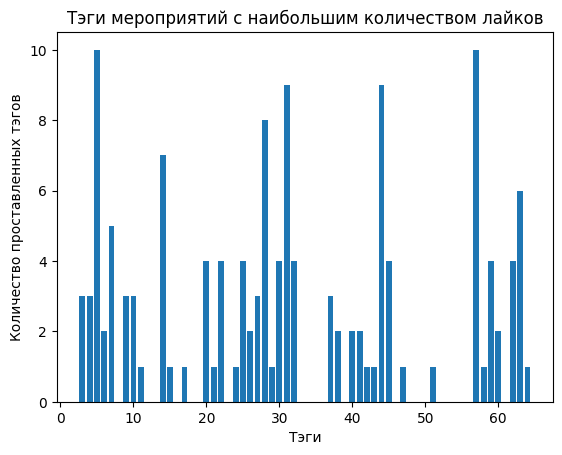

([3, 4, 5, 6, 7, 9, 10, 11, 14, 15, 17, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 37, 38, 40, 41, 42, 43, 44, 45, 47, 51, 57, 58, 59, 60, 62, 63, 64], [3, 3, 10, 2, 5, 3, 3, 1, 7, 1, 1, 4, 1, 4, 1, 4, 2, 3, 8, 1, 4, 9, 4, 3, 2, 2, 2, 1, 1, 9, 4, 1, 1, 10, 1, 4, 2, 4, 6, 1])


In [ ]:
print(most_popular_tags(events_info[events_info.action == '"LIKED"'].
                  sort_values(by = 'number', ascending=False)[:50]['tag_id_x'], chart=True,
                  label = 'Тэги мероприятий c наибольшим количеством лайков'))

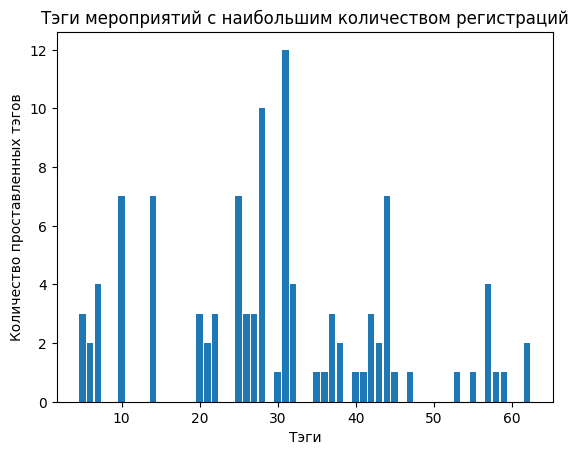

([5, 6, 7, 10, 14, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 47, 53, 55, 57, 58, 59, 62], [3, 2, 4, 7, 7, 3, 2, 3, 7, 3, 3, 10, 1, 12, 4, 1, 1, 3, 2, 1, 1, 3, 2, 7, 1, 1, 1, 1, 4, 1, 1, 2])


In [ ]:
print(most_popular_tags(events_info[events_info.action == '"REGISTERED"'].
                  sort_values(by = 'number', ascending=False)[:50]['tag_id_x'], chart=True,
                  label = 'Тэги мероприятий c наибольшим количеством регистраций'))